In [1]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
class Point(object):
    def __init__(self, sig, eps, kmax, lmax, mmax, nmax, components, max_dimension, table_before, table_after, good_spins, bad_spins, cb_time, cb_cpu):
        self.sig = sig
        self.eps = eps
        self.kmax = kmax
        self.lmax = lmax
        self.mmax = mmax
        self.nmax = nmax
        self.components = components
        self.max_dimension = max_dimension
        self.table_before = table_before
        self.table_after = table_after
        self.good_spins = good_spins
        self.bad_spins = bad_spins
        #self.allowed = allowed
        #self.run_time = run_time
        #self.cpu_time = cpu_time
        self.cb_time = cb_time
        self.cb_cpu = cb_cpu
        #self.xml_time = xml_time
        #self.xml_cpu = xml_cpu
        #self.sdp_time = sdp_time
        #self.sdp_cpu = sdp_cp

In [3]:
point_table = []

In [4]:
file_name = 'cat_file'

In [5]:
with open(file_name + ".py") as infile:
    for line in infile:
        exec(line)

In [6]:
len(point_table)

865

In [7]:
unique_points = []
ks = []
kvalues = [k for k in range(15, 61)]
for point in point_table:
    if point.kmax in kvalues:
        unique_points.append(point)
        kvalues.remove(point.kmax)

In [8]:
kmax = []
bad_spins = []
good_spins = []
for point in unique_points:
    kmax.append(point.kmax)
    bad_spins.append(point.bad_spins)
    good_spins.append(point.good_spins)

In [9]:
a = []
b = []
y = []
z = []
for i in range(len(kmax)):
    for j in range(len(bad_spins[i])):
        a.append(kmax[i])
        y.append(bad_spins[i][j])
    for k in range(len(good_spins[i])):
        b.append(kmax[i])
        z.append(good_spins[i][k])

In [10]:
len(a)

593

In [11]:
len(y)

593

In [12]:
len(b)

2417

In [13]:
len(z)

2417

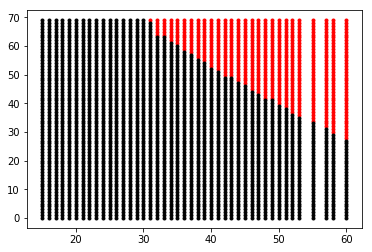

In [14]:
# Plot a grid.
plt.plot(a, y, 'r.')
plt.plot(b, z, 'k.')

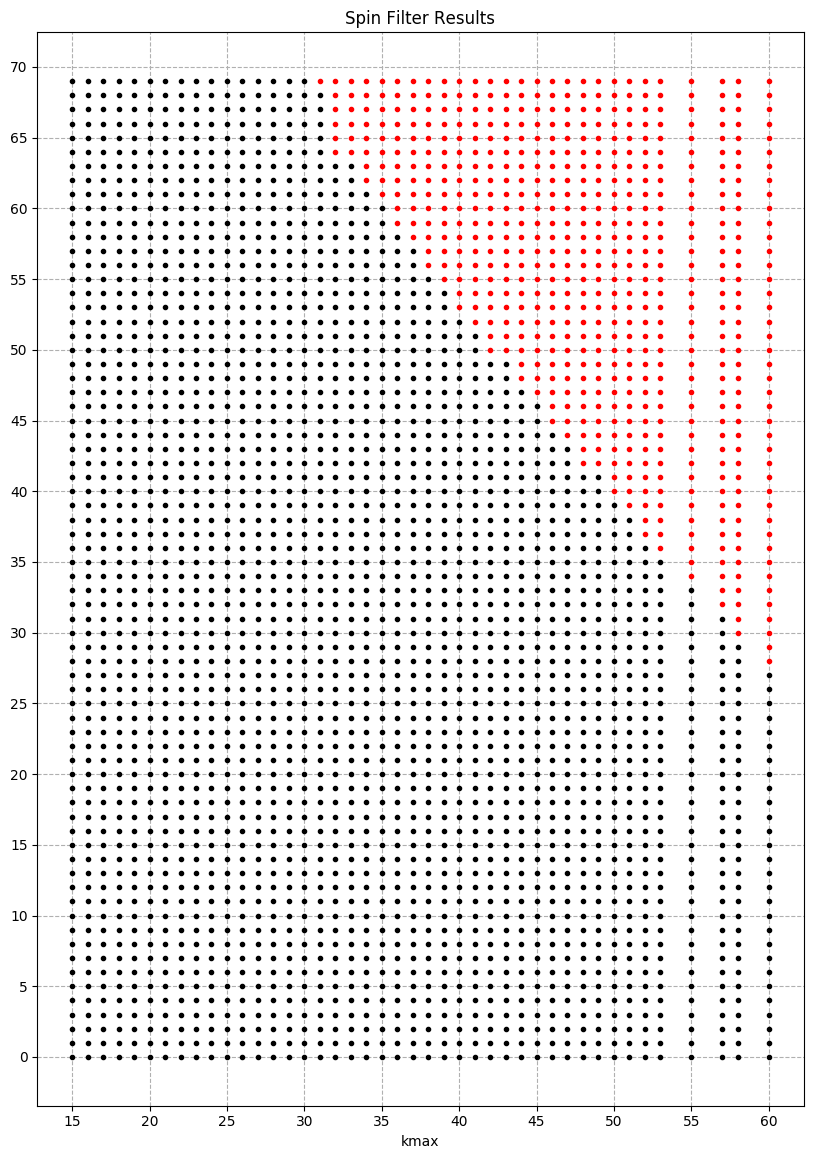

In [15]:
name = "spin_filter_results"

pdf_pages = PdfPages(name + ".pdf")

# Define the number of plots per page and the size of the grid board.
nb_plots = 1
nb_plots_per_page = 1
nb_pages = 1
grid_size=(1,1)
    
# This will define which row of the grid we are on.
row_index = 0

fig = plt.figure(figsize=(8.27, 11.69), dpi=100)
        
    # Now, add a plot for the current grid on the grid board.
plt.subplot2grid(grid_size, (row_index, i % grid_size[1]))
if i % grid_size[1] == 1:
    row_index += 1
        
# Plot a grid.
# if table[i].run_time != 0 and table[i].cpu_time != 0:
ax = fig.gca()
ax.set_xticks(np.arange(15, 61, 5))
ax.set_yticks(np.arange(0, 71, 5))
plt.plot(a, y, 'r.')
plt.plot(b, z, 'k.')
plt.title("Spin Filter Results")
plt.xlabel("kmax")
plt.grid(axis = 'both', linestyle = "--")
#plt.ylabel("l")

# If we have filled a page, or have reached the end of our plots, tight-pack and save the page.
if (i + 1) % nb_plots_per_page == 0 or (i + 1) == nb_plots:
    plt.tight_layout()
    pdf_pages.savefig(fig)
    row_index = 0
            
pdf_pages.close()